# Плотность вероятности нормального распределения (гистограмма и функция)

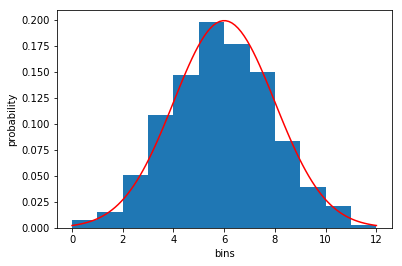

In [36]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import norm
%matplotlib inline

mu=6
sig=2
data = sig * rnd.standard_normal(1000) + mu

a = plt.hist(data, bins = 12, range = (0,12), normed=True)
x = np.linspace(0,12,100)
y = norm.pdf(x,mu,sig)  # Probability density function

plt.plot(x,y,'r')
plt.xlabel('bins')
plt.ylabel('probability')

plt.show()

# Пример класса

In [14]:
class Employee(object):
    """common base class for all employees"""
    empCount = 0
    
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary
        Employee.empCount += 1
        
    def displayCount(self):
        print("Total Employee %d" %Employee.empCount)
        
    def displayEmployee(self):
        print("Name : ", self.name, ", Salary: ", self.salary)
        
        
first = Employee("John", 3800)

first.displayCount()
first.displayEmployee()

Total Employee 1
Name :  John , Salary:  3800


# Тестовый декоратор

In [23]:
def my_decorator(func):
    def function_wrapper(x):
        print("before function " + func.__name__)
        func(x)
        print("after function " + func.__name__)
    return function_wrapper

def foo(x):
    print("Hi, foo has been called with " + str(x))


    
foo("я без декоратора")
print("\n")

@my_decorator
def foo(x):
    print("Hi, foo has been called with " + str(x))
    
#foo("я с декоратором")
foo(42)

Hi, foo has been called with я без декоратора


before function foo
Hi, foo has been called with 42
after function foo


# декоратор на время выполнения функции

In [21]:
import time as t

def time_decor(func):
    def function_wrapper(x):
        ts = t.time()
        func(x)
        te = t.time()
        print('%r  %2.2f ms' % (func.__name__, (te - ts) * 1000))
    return function_wrapper
    
@time_decor
def foo(x):
    print("Hi, foo has been called with " + str(x))
    
foo("lol")

Hi, foo has been called with lol
'foo'  0.31 ms


# Кэширующий декоратор

In [37]:
class cache_decor(object):
    def __init__(self, func):
        self.func = func
        self.cache = {}
    
    def __call__(self, *args):
        if args in self.cache:
            print("yes")
            return self.cache[args]
        else:
            value = self.func(*args)
            self.cache[args] = value
            return value

@cache_decor        
def my_sum(a, b):
    return a + b

print(my_sum(1, 3))
print("\n")
print(my_sum(1, 3))

4


yes
4
